# Retrieval of PSDs from Spectra
This script creates stackplots of spectra and retrieved properties on different heights.

In [1]:
from PSDretrieval import processRadar as pR
from PSDretrieval import plotting as pl
from PSDretrieval import scattering as sc
from PSDretrieval import retrievalUtils as rU
import snowScatt
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import warnings
warnings.filterwarnings('ignore')


# Slightly altered function not contained in original retrieval packages.
def shiftSpecWindow(SpecWindow,westimate):
    '''
    shift a window of spectra by the vertical wind information contained in the dataset
    '''

    if np.isnan(westimate):
        print("ERROR: cannot shift spectra because W cannot be determined (or is NaN for another reason)")
        sys.exit(0)
    #get Doppler velocity resolution
    DelDV = (SpecWindow.doppler[1]-SpecSingle.doppler[0]).values #[m/s]
    dopplerBinShifts = int(round(westimate/DelDV))
    
    SpecWindow = SpecWindow.shift(doppler=-dopplerBinShifts)

    return SpecWindow

### Choose case to study here.
Each case needs its own manual estimation of vertical wind (westimate) on each height and its own manual estimate of noise level (zuThreshold). Indicators as to how to choose them are found by plotting the unshifted, unpruned spectra as seen below.
Here three example cases were prepared. They represent calm, homogeneous events with cloud top temperatures of ca. -15°C.

In [3]:
heights = [2300, 2200, 2100, 2000, 1900, 1800, 1700]                                     # in [m]
date = "20181124"
time = "17:11:00"
westimate = [-0., -0., -0.1, -0.15, -0.15, -0.2, -0.22]                                  # in [m/s] downwards
zeThreshold=-40


#heights = [3600, 3400, 3200, 3000, 2800, 2600, 2400, 2200]                              # in [m]
#date = "20190122"
#time = "14:59:40"
#a = -2
#westimate = [a, a, a, a, a, a, a, a]                                                    # in [m/s] downwards
#zeThreshold=-30


#heights = [4500, 4000, 3500, 3000, 2500, 2000, 1500, 1000]                              # in [m]
#date = "20190130"
#time = "13:10:00"
#westimate = [-0.25, 0., 0., 0., -0.1, -0.1, -0.1, -0.1]                                 # in [m/s] downwards
#zeThreshold=-30 

### Plot Observed Spectrogram
(to get an idea of the studied case)

loadAllHeights True
in if
load files: /data/obs/campaigns/tripex-pol/processed/tripex_pol_level_0/2018/11/24/20181124_*_tripex_pol_3fr_spec_filtered_regridded.nc
merging datasets done
<xarray.Dataset>
Dimensions:       (doppler: 600, range: 334, time: 1)
Coordinates:
  * range         (range) float32 0.0 36.0 72.0 ... 11916.0 11952.0 11988.0
  * time          (time) datetime64[ns] 2018-11-24T17:11:00
  * doppler       (doppler) float64 -5.0 -4.99 -4.98 -4.97 ... 0.97 0.98 0.99
Data variables:
    WSpecH        (time, range, doppler) float32 dask.array<chunksize=(1, 334, 1), meta=np.ndarray>
    KaSpecH       (time, range, doppler) float32 dask.array<chunksize=(1, 334, 1), meta=np.ndarray>
    XSpecH        (time, range, doppler) float32 dask.array<chunksize=(1, 334, 1), meta=np.ndarray>
    XSpecNoiseH   (time, range) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    KaSpecNoiseH  (time, range) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>


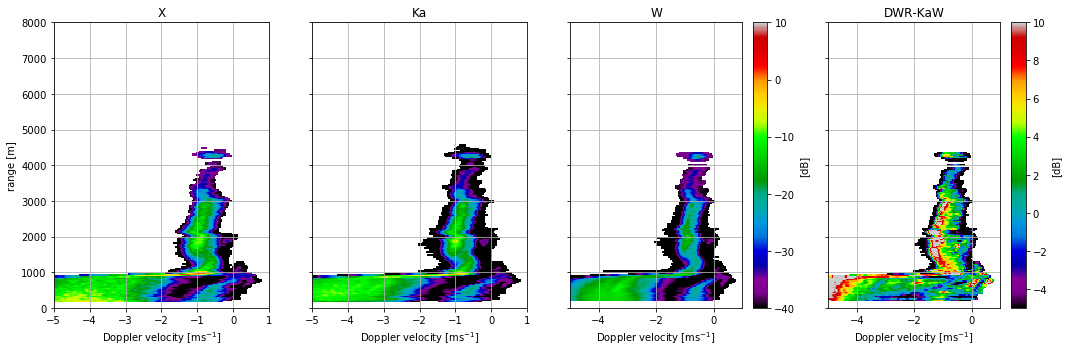

In [4]:
# load the Spectrograms
SpecOneTime = pR.loadSpectra(date=date,time=time,tRange=0,
                             dataPath="/data/obs/campaigns/tripex-pol/processed/",
                             loadAllHeights=True,loadSample=False)
# plot the Spectrograms
pl.plotSpectraObsAllHeights(SpecOneTime)

### Load Reflectivity Data from Time-Height-Window
SpecWindows will contain an xarray filled with the reflectivity properties of each observation in the chosen time-height-window for each height. mean_SpecWindow will contain the averages of these properties for each height.

loadAllHeights False
load files: /data/obs/campaigns/tripex-pol/processed/tripex_pol_level_0/2018/11/24/20181124_*_tripex_pol_3fr_spec_filtered_regridded.nc
merging datasets done
loadAllHeights False
load files: /data/obs/campaigns/tripex-pol/processed/tripex_pol_level_0/2018/11/24/20181124_*_tripex_pol_3fr_spec_filtered_regridded.nc
merging datasets done
loadAllHeights False
load files: /data/obs/campaigns/tripex-pol/processed/tripex_pol_level_0/2018/11/24/20181124_*_tripex_pol_3fr_spec_filtered_regridded.nc
merging datasets done
loadAllHeights False
load files: /data/obs/campaigns/tripex-pol/processed/tripex_pol_level_0/2018/11/24/20181124_*_tripex_pol_3fr_spec_filtered_regridded.nc
merging datasets done
loadAllHeights False
load files: /data/obs/campaigns/tripex-pol/processed/tripex_pol_level_0/2018/11/24/20181124_*_tripex_pol_3fr_spec_filtered_regridded.nc
merging datasets done
loadAllHeights False
load files: /data/obs/campaigns/tripex-pol/processed/tripex_pol_level_0/2018/11/24/2

[<xarray.Dataset>
 Dimensions:       (doppler: 600, range: 3, time: 3)
 Coordinates:
   * range         (range) float32 2268.0 2304.0 2340.0
   * time          (time) datetime64[ns] 2018-11-24T17:10:56 ... 2018-11-24T17:11:04
   * doppler       (doppler) float64 -5.0 -4.99 -4.98 -4.97 ... 0.97 0.98 0.99
 Data variables:
     WSpecH        (time, range, doppler) float64 dask.array<chunksize=(3, 3, 1), meta=np.ndarray>
     KaSpecH       (time, range, doppler) float64 dask.array<chunksize=(3, 3, 1), meta=np.ndarray>
     XSpecH        (time, range, doppler) float64 dask.array<chunksize=(3, 3, 1), meta=np.ndarray>
     XSpecNoiseH   (time, range) float32 dask.array<chunksize=(3, 3), meta=np.ndarray>
     KaSpecNoiseH  (time, range) float32 dask.array<chunksize=(3, 3), meta=np.ndarray>
     DWR_X_Ka      (time, range, doppler) float64 dask.array<chunksize=(3, 3, 1), meta=np.ndarray>
     DWR_Ka_W      (time, range, doppler) float64 dask.array<chunksize=(3, 3, 1), meta=np.ndarray>
     pa  

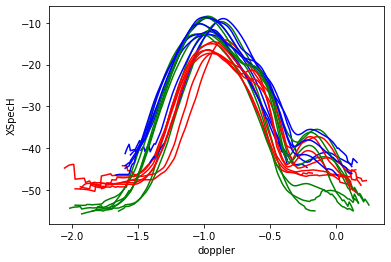

In [5]:
SpecWindows = []
mean_SpecWindows = []
for h in heights:
    SpecWindow  = pR.loadSpectra(date=date,
                                 time=time,
                                 tRange=0.25,
                                 hRange=80,
                                 hcenter=h,
                                 loadSample=False,
                                 createSample=False,
                                 dataPath="/data/obs/campaigns/tripex-pol/processed/")
    SpecWindows.append(SpecWindow)
    # mean spectrum in window
    mean_SpecWindow = SpecWindow.mean(dim=["time","range"])
    mean_SpecWindow.KaSpecH.plot(color='green')
    mean_SpecWindow.WSpecH.plot(color='red')
    mean_SpecWindow.XSpecH.plot(color='blue')
    mean_SpecWindows.append(mean_SpecWindow)
SpecWindows
#mean_SpecWindows 


### Plot Sample Spectra
For each height plot one of the observations within the window as a sample from which to gauge estimates for vertical wind (westimate) and noise level (zeThreshold).

In [6]:
SpecSingles = []
for i in range(len(heights)):
    SpecSingle  = pR.selectSingleTimeHeight(SpecWindows[i])
    SpecSingles.append(SpecSingle)
#SpecSingles

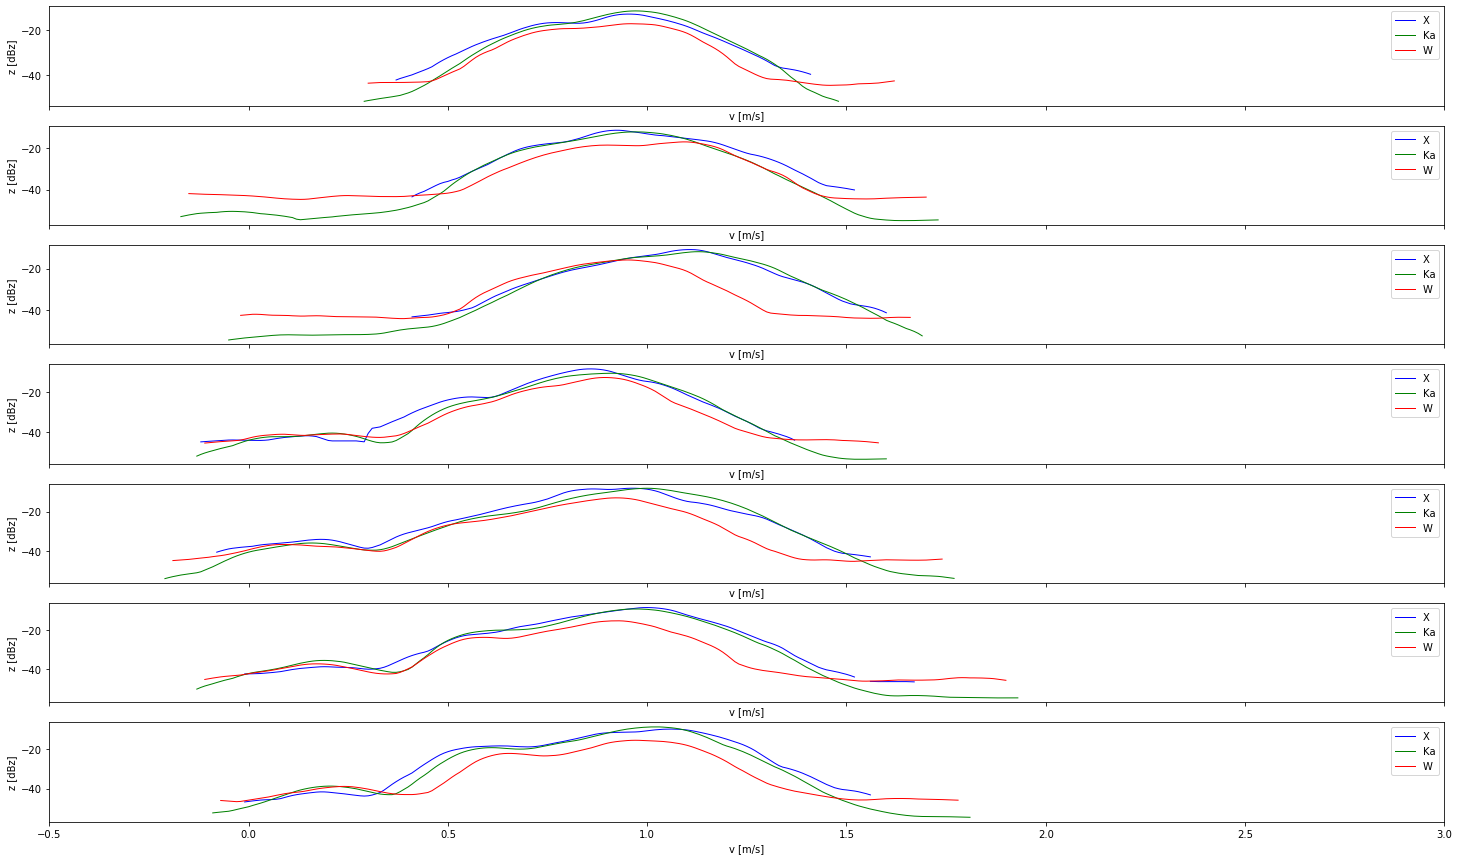

In [7]:
fig,ax = plt.subplots(nrows=len(heights),ncols=1, figsize=(25,15), sharex=True)
for i in range(len(heights)):
    ax[i] = pl.plotObsSpectra(SpecSingles[i],ax[i])

### Adjust by Manual Estimate for Vertical Wind and Plot Again
Attention this assumes a constant w for the whole SpecWindow (time-height) window

In [8]:
# shift SpecWindows
datasets = []
for i in range(len(heights)):
    SpecWindowWshifted  = shiftSpecWindow(SpecWindows[i], westimate[i])
    datasets.append(SpecWindowWshifted)
SpecWindows = datasets

In [9]:
#extract a single spectrum from each time-height window (now shifted by the westimate)
datasets = []
for i in range(len(heights)):
    SpecSingle  = pR.selectSingleTimeHeight(SpecWindows[i])
    datasets.append(SpecSingle)
SpecSingles = datasets
#SpecSingles

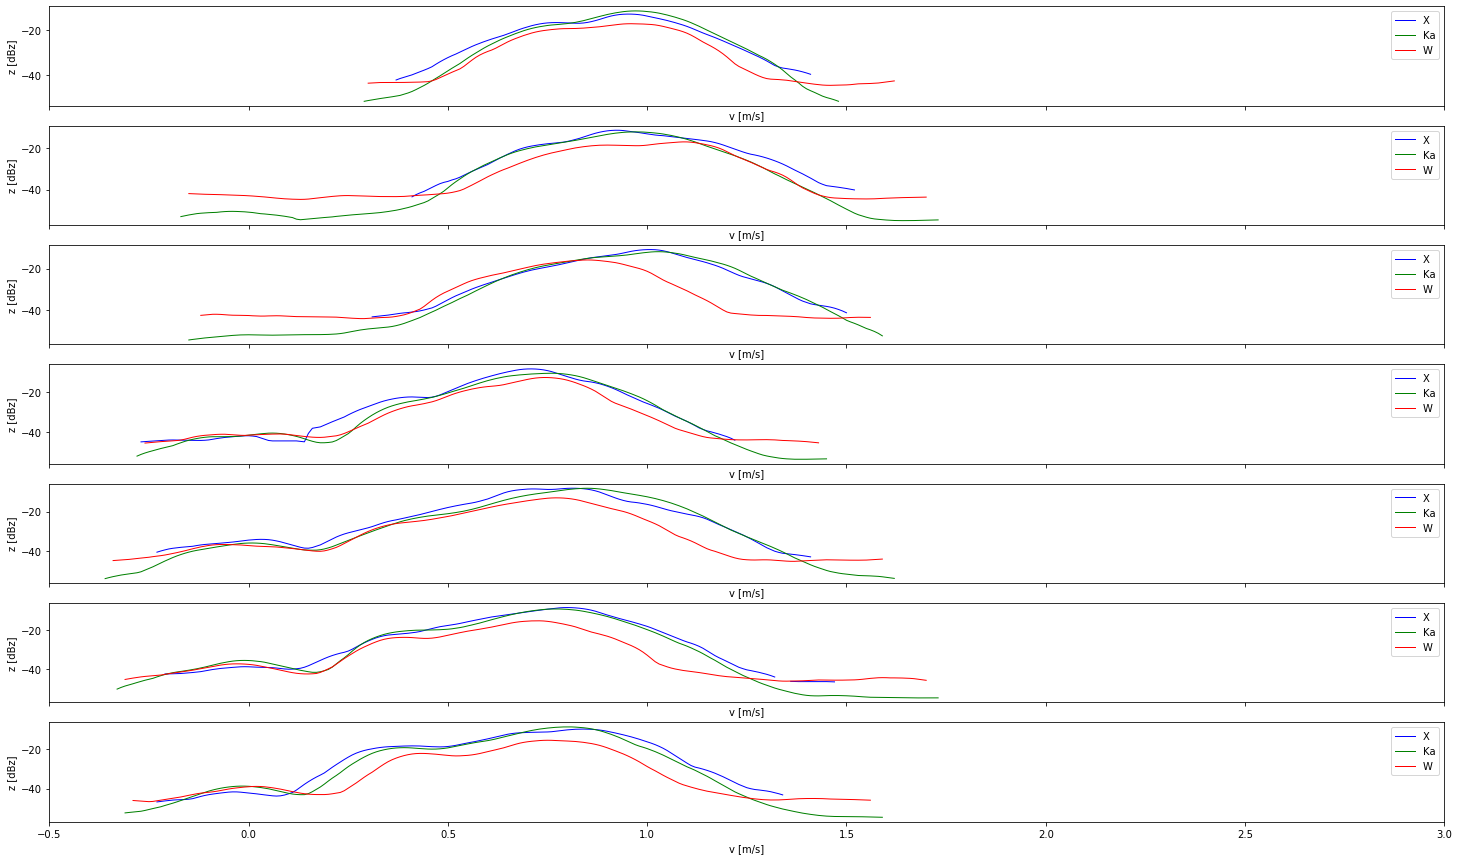

In [10]:
fig,ax = plt.subplots(nrows=len(heights),ncols=1, figsize=(25,15), sharex=True)
for i in range(len(heights)):
    ax[i] = pl.plotObsSpectra(SpecSingles[i],ax[i])

### Cut Noisy Part and Plot Spectra Again

In [11]:
# Add information on where to cut off to SpecWindows.
datasets = []
for i in range(len(heights)):
    SpecWindow = pR.cutLowZe(SpecWindows[i],zeThreshold=zeThreshold)
    datasets.append(SpecWindow)
SpecWindows = datasets

In [12]:
#extract a single spectrum from each time-height window (now with the W- and pruning information)
datasets = []
for i in range(len(heights)):
    SpecSingle  = pR.selectSingleTimeHeight(SpecWindows[i])
    datasets.append(SpecSingle)
SpecSingles = datasets
#SpecSingles

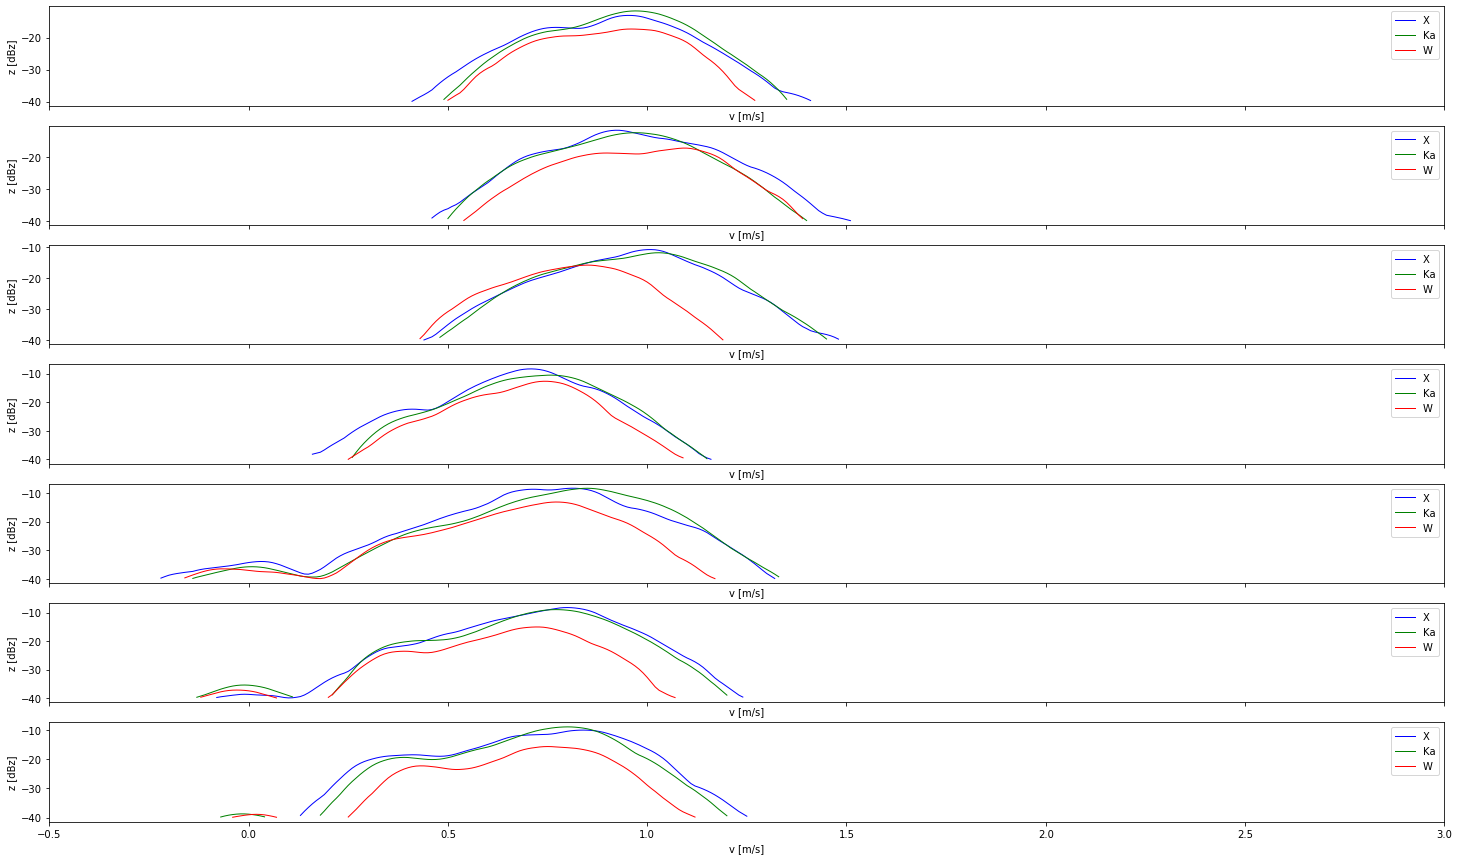

In [13]:
fig,ax = plt.subplots(nrows=len(heights),ncols=1, figsize=(25,15), sharex=True)
for i in range(len(heights)):
    ax[i] = pl.plotObsSpectra(SpecSingles[i],ax[i])

In [14]:
# plot single-spectra DV vs. DWR
#fig,ax = plt.subplots(nrows=len(heights),ncols=2, figsize=(25,40), sharex=True)
#for i in range(len(heights)):
#    __ = pl.plotSDWRvsDVobs(SpecSingles[i],ax[i,:])

### Plot Window Average of Spectra
This is the spectrum used for the retrieval.

In [16]:
mean_SpecWindows_shiftedandpruned = []
for i in range(len(heights)):
    # mean spectrum in window
    mean_SpecWindow_shiftedandpruned = SpecWindows[i].mean(dim=["time","range"])
    mean_SpecWindows_shiftedandpruned.append(mean_SpecWindow_shiftedandpruned)
#mean_SpecWindows_shiftedandpruned

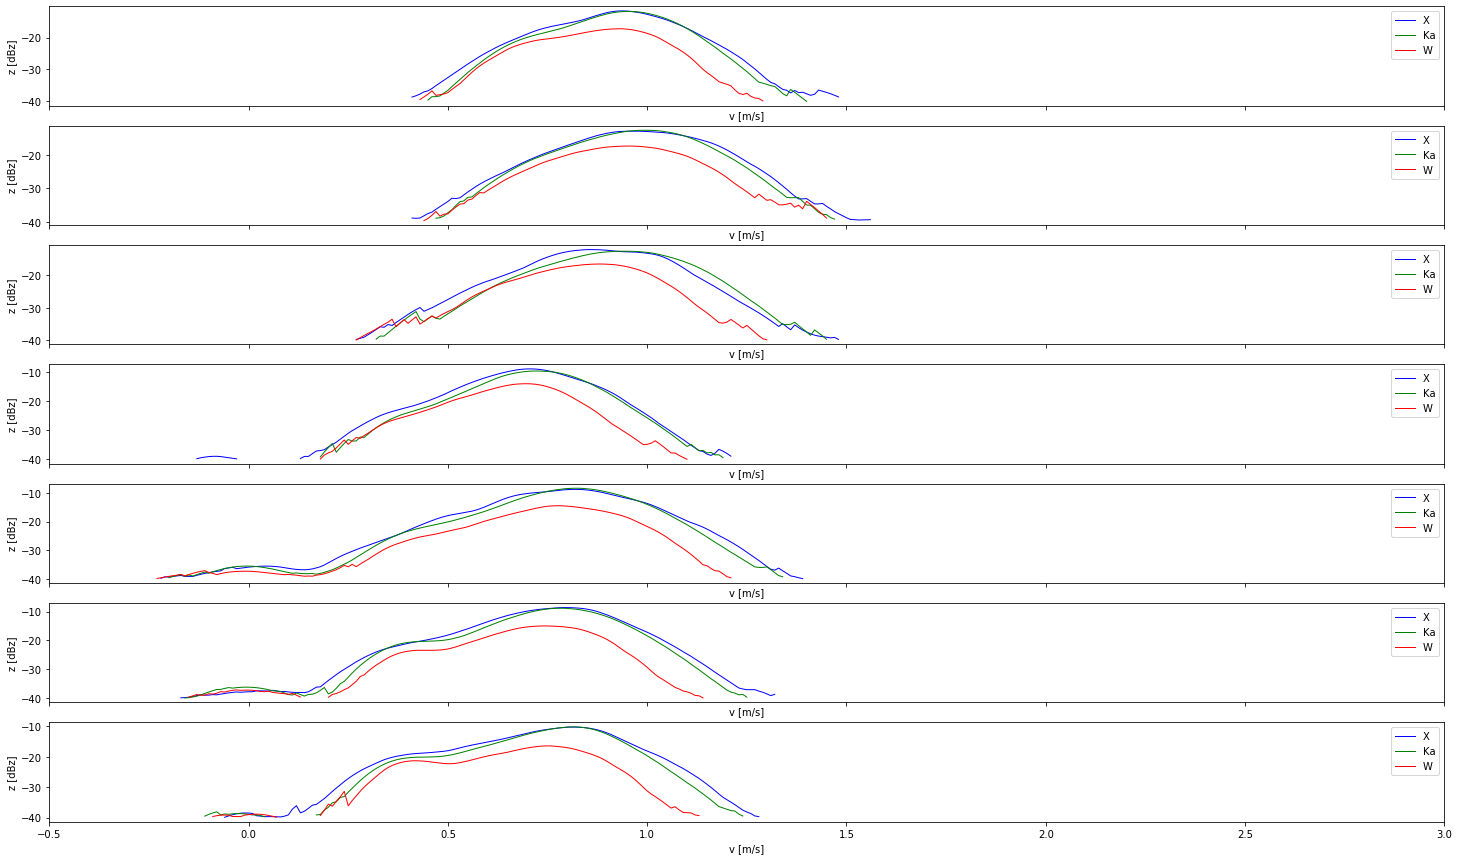

In [17]:
fig,ax = plt.subplots(nrows=len(heights),ncols=1, figsize=(25,15), sharex=True)
for i in range(len(heights)):
    ax[i] = pl.plotObsSpectra(mean_SpecWindows_shiftedandpruned[i],ax[i])

In [18]:
# plot average DV vs. DWR from time-height window
#fig,ax = plt.subplots(nrows=len(heights),ncols=2, figsize=(18,22), sharex=True, sharey=True)
#for i in range(len(heights)):
#    __ = pl.plotSDWRvsDVobs(SpecWindows[i],ax[i,:])
#    ax[i,0].grid()
#    ax[i,1].grid()

### Compare the DV-DWR-relation of Snowscatt Models of Different Particle Types to the Observed DV-DWR-relation
The comparison is shown for three different sets of particle types in the following three plots.

#### mixcoldend with all riming degrees

plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window


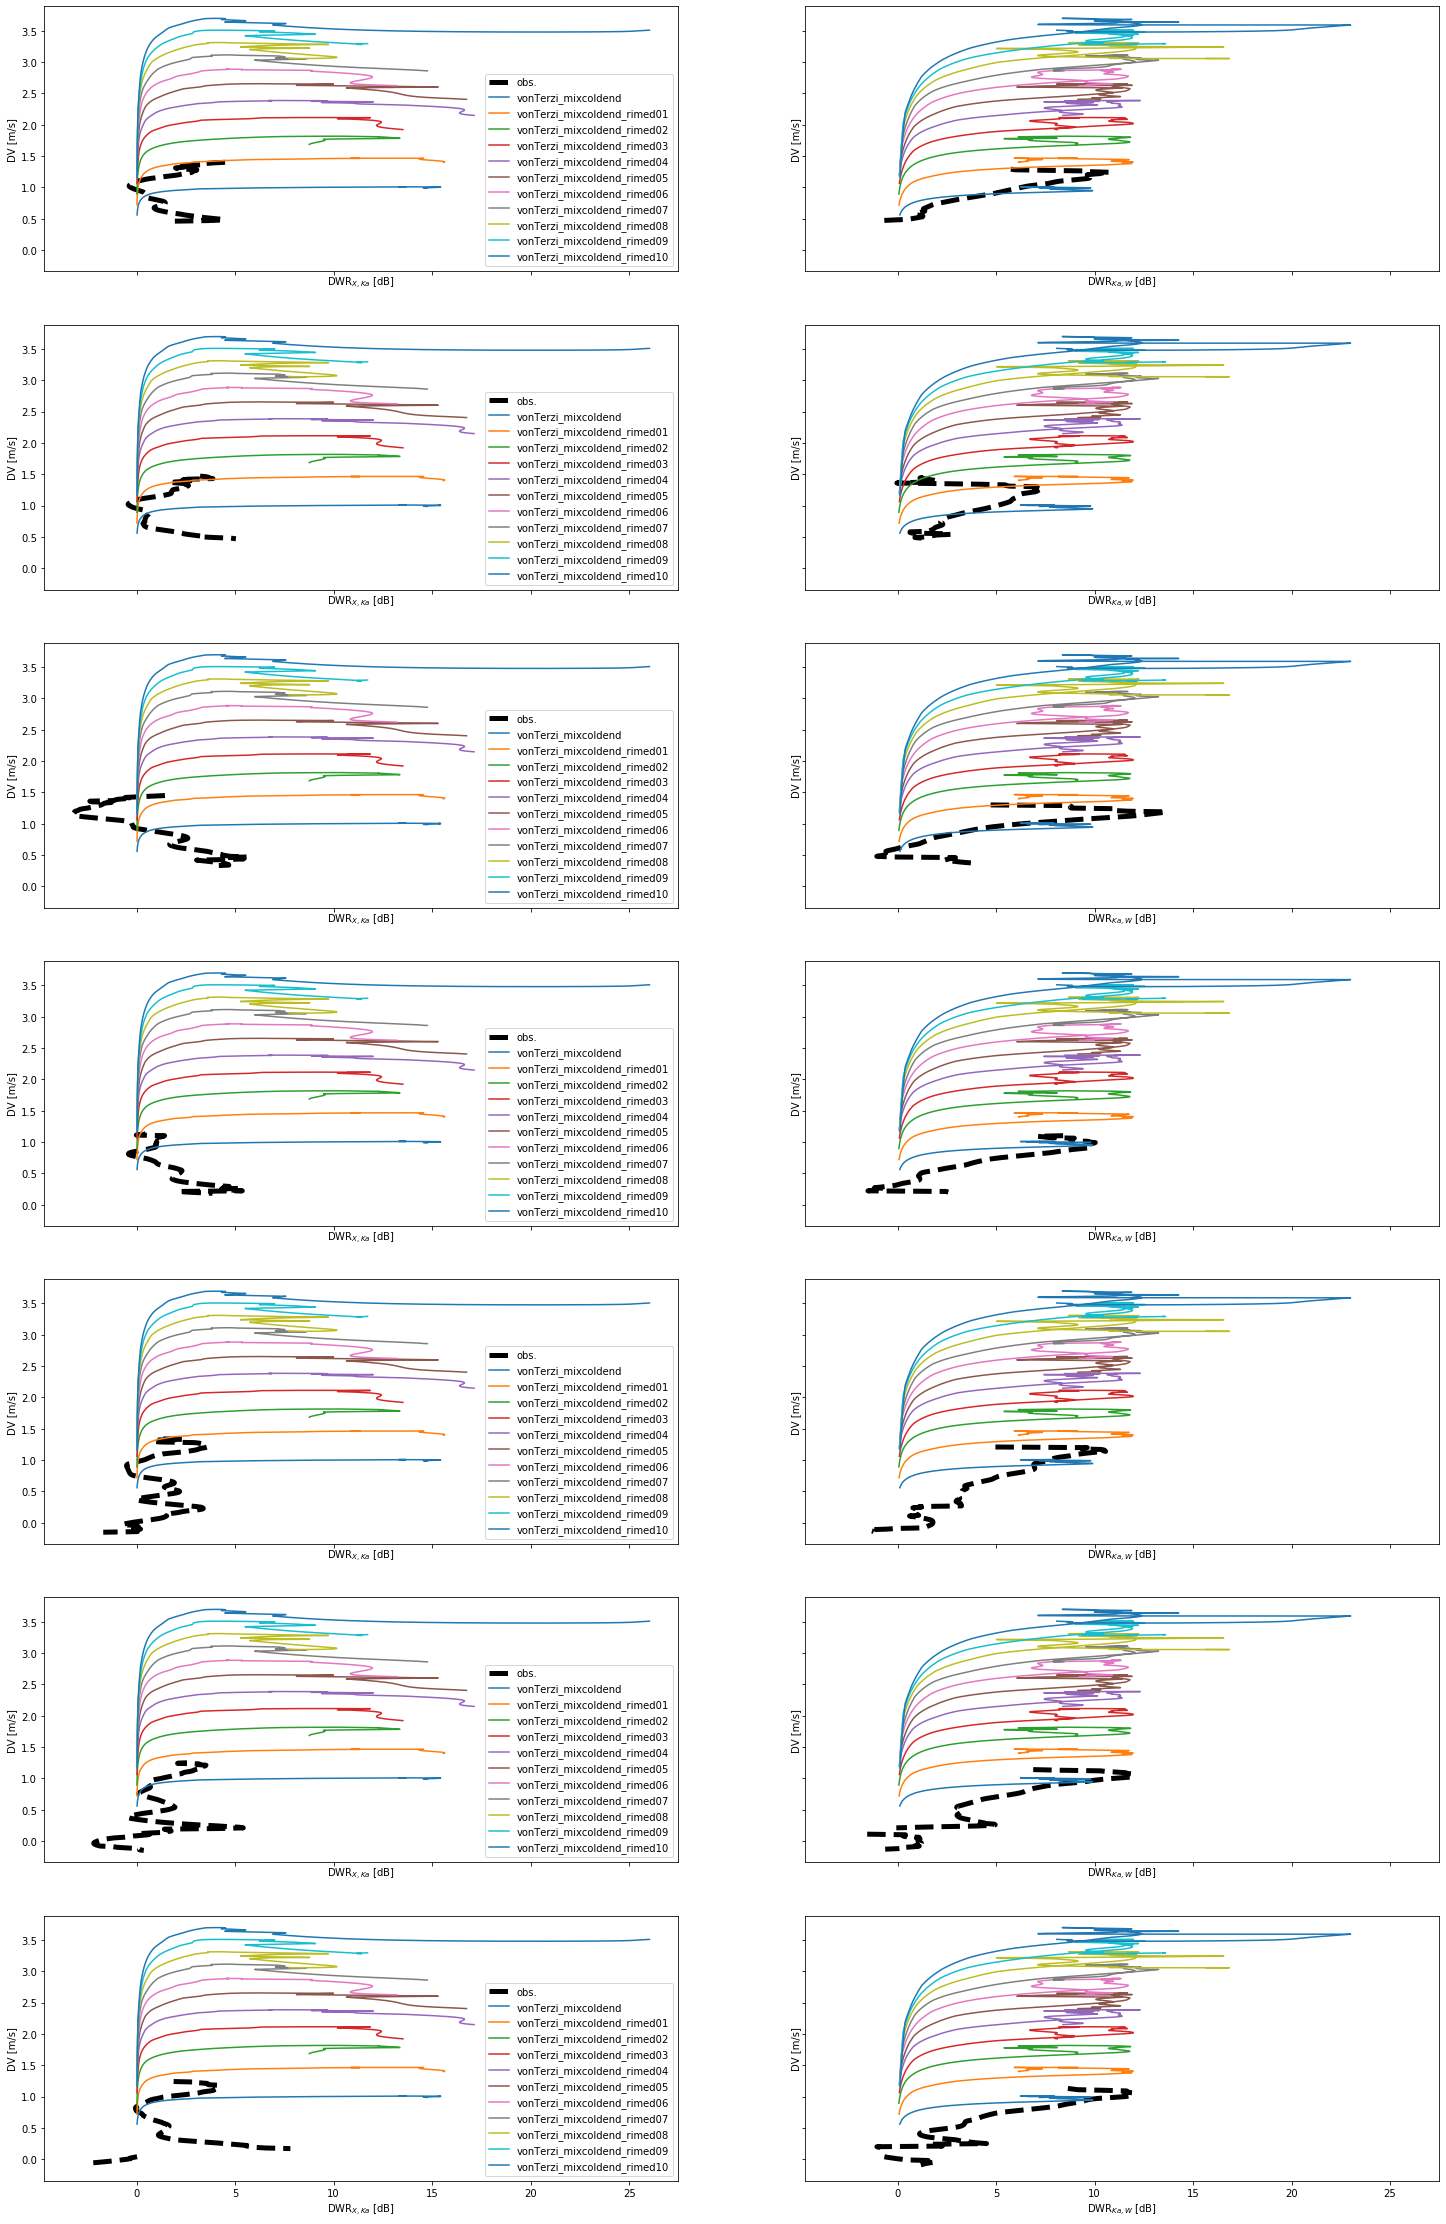

In [19]:
#get names of all particle types
allParticleTypes        = [*snowScatt.snowLibrary._fileList.keys()]
#select an aggregate type
aggType = 'vonTerzi_mixcoldend'
#get a list of all particle-type names from this aggregate type with different riming degrees
allRimDegr = [k for k in allParticleTypes if aggType in k]

fig,ax = plt.subplots(nrows=len(heights),ncols=2, figsize=(25,40), sharex=True, sharey=True)
for i in range(len(heights)):
    ax[i,:] = pl.plotSDWRvsDVobs(SpecWindows[i],ax[i,:])
    for pType in allRimDegr:
        #get spectral-resolved particle properties
        Zx, Zk, Zw, Dmax, K2, vel = sc.model3fOne(pType,temperature=float(SpecSingles[i]["ta"].values))
        #calculate spectral DWRs
        DWRxk = Zx-Zk; DWRkw = Zk-Zw
        ax[i,:] = pl.plotSDWRvsDVmodel(vel,DWRxk,DWRkw,ax[i,:],pType)
    ax[i,0].legend()

#### all unrimed vonTerzis'

plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window


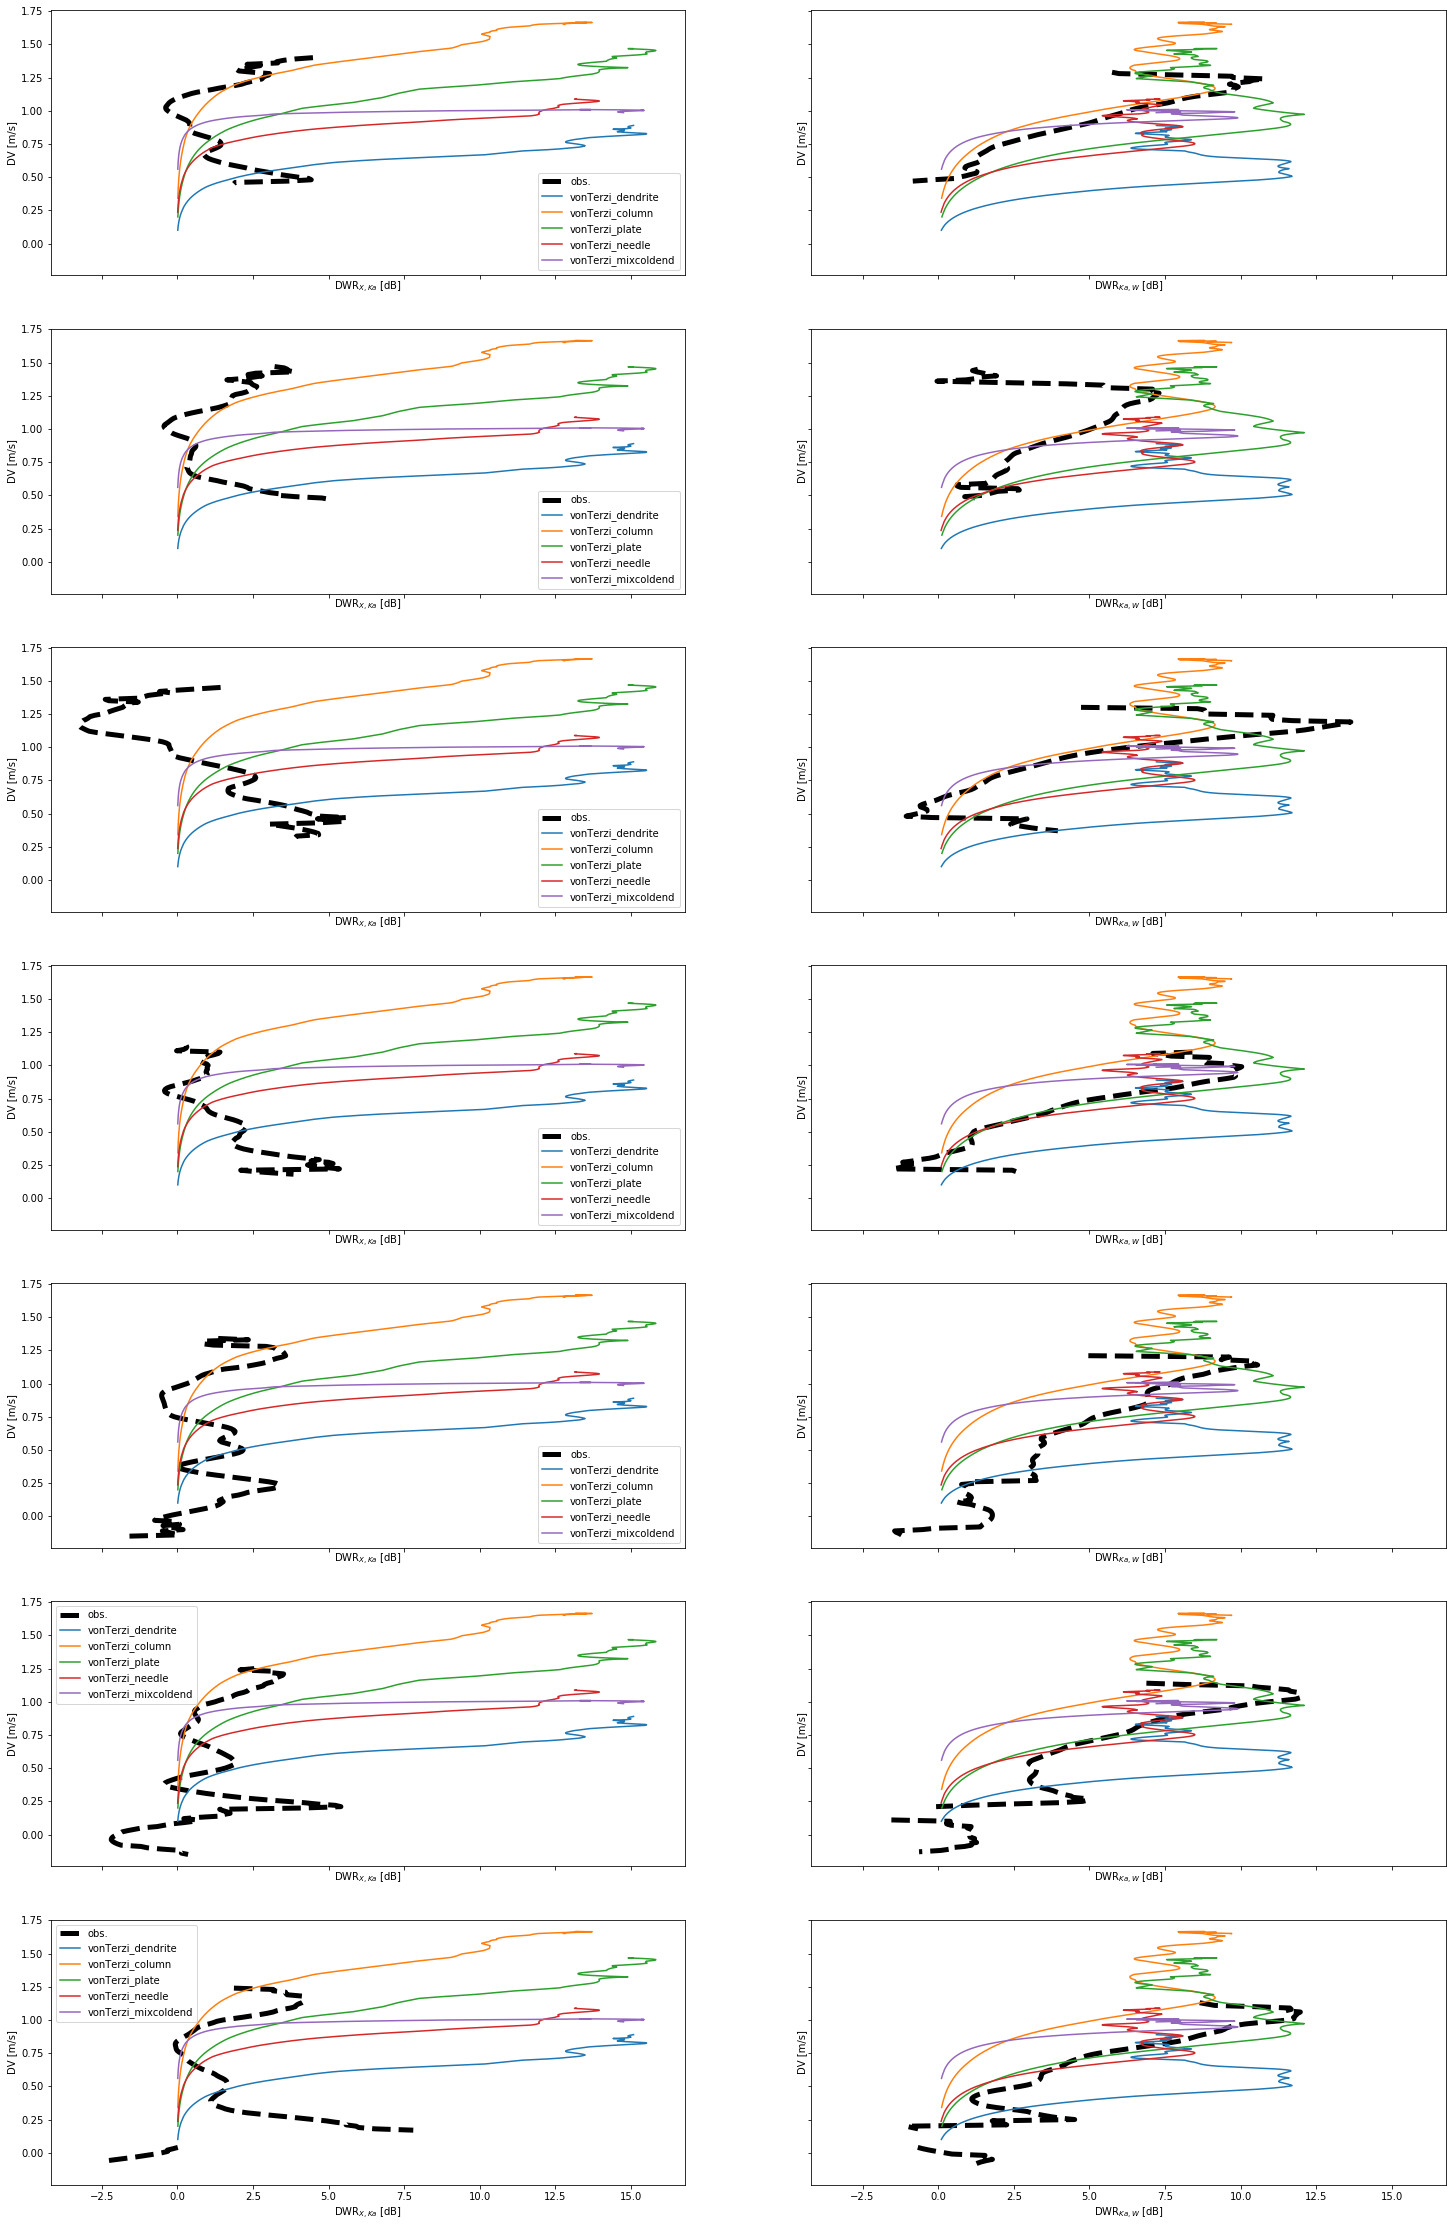

In [20]:
#get names of all particle types
allParticleTypes        = [*snowScatt.snowLibrary._fileList.keys()]
#get a list of all particle-type names from this aggregate type with different riming degrees
allUnrimVT = [k for k in allParticleTypes if ("vonTerzi_" in k and not "rimed" in k)]

fig,ax = plt.subplots(nrows=len(heights),ncols=2, figsize=(25,40), sharex=True, sharey=True)
for i in range(len(heights)):
    ax[i,:] = pl.plotSDWRvsDVobs(SpecWindows[i],ax[i,:])
    for pType in allUnrimVT:
        #get spectral-resolved particle properties
        Zx, Zk, Zw, Dmax, K2, vel = sc.model3fOne(pType)
        #calculate spectral DWRs
        DWRxk = Zx-Zk; DWRkw = Zk-Zw
        ax[i,:] = pl.plotSDWRvsDVmodel(vel,DWRxk,DWRkw,ax[i,:],pType)
    ax[i,0].legend()

#### all Leinonens' and Ori

plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window


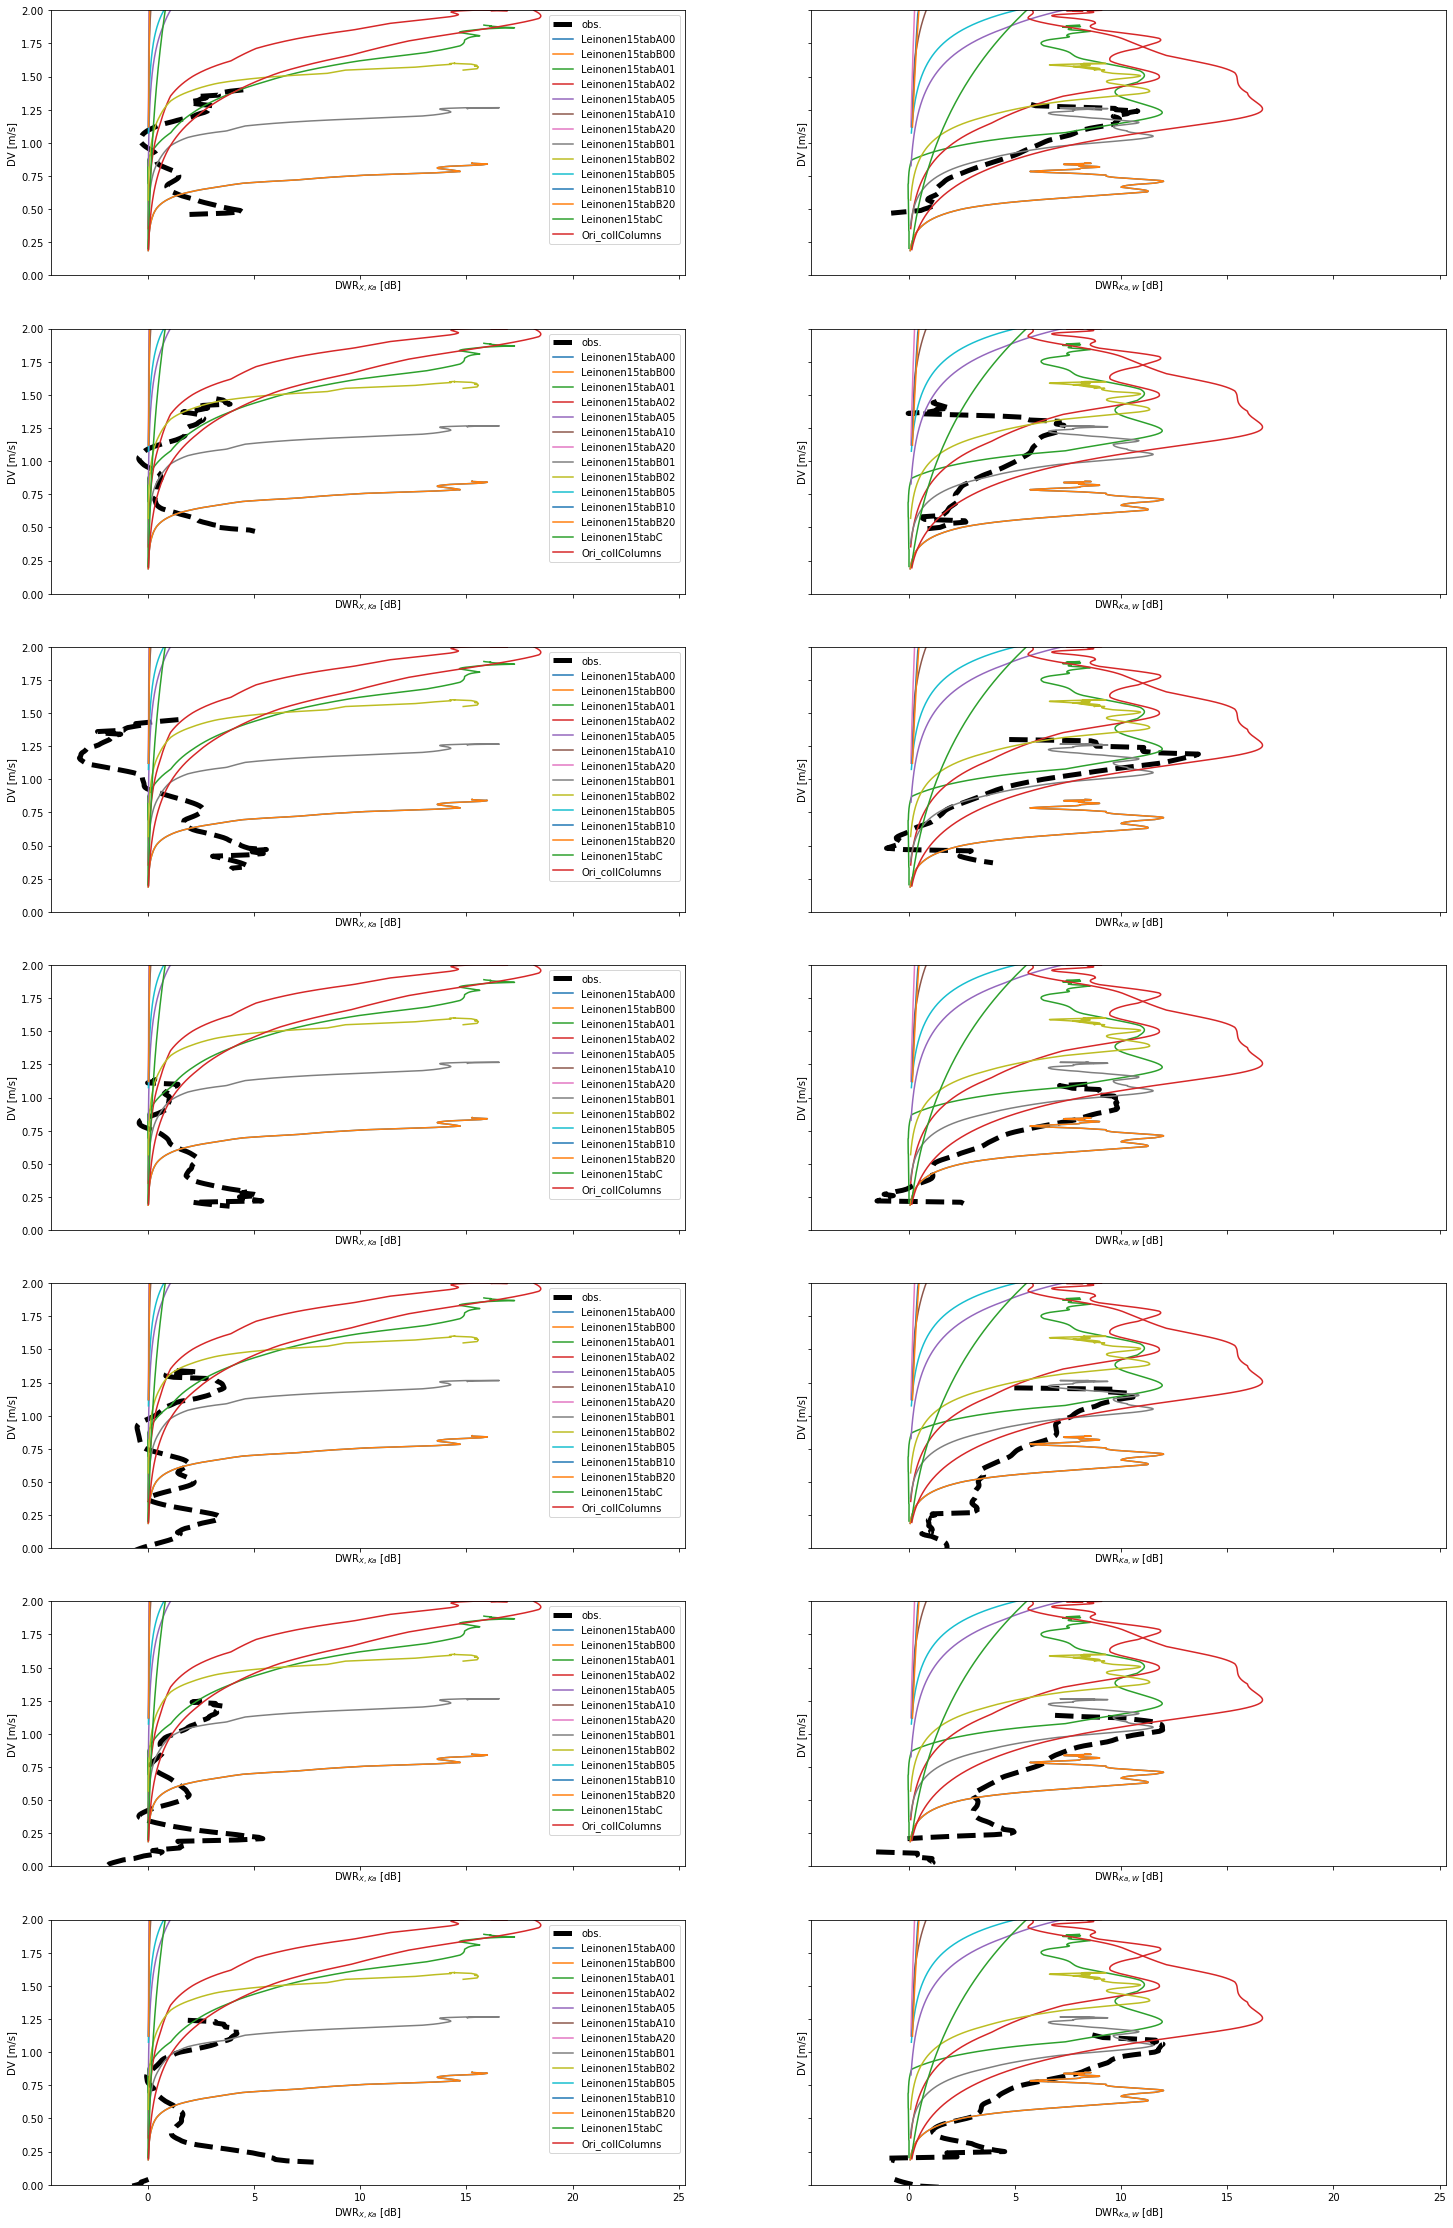

In [21]:
#get names of all particle types
allParticleTypes        = [*snowScatt.snowLibrary._fileList.keys()]
#get a list of all particle-type names from this aggregate type with different riming degrees
allUnrimVT = [k for k in allParticleTypes if ("Leinonen" in k or "Ori" in k)]

fig,ax = plt.subplots(nrows=len(heights),ncols=2, figsize=(25,40), sharex=True, sharey=True)
for i in range(len(heights)):
    ax[i,:] = pl.plotSDWRvsDVobs(SpecWindows[i],ax[i,:])
    for pType in allUnrimVT:
        #get spectral-resolved particle properties
        Zx, Zk, Zw, Dmax, K2, vel = sc.model3fOne(pType)
        #calculate spectral DWRs
        DWRxk = Zx-Zk; DWRkw = Zk-Zw
        ax[i,:] = pl.plotSDWRvsDVmodel(vel,DWRxk,DWRkw,ax[i,:],pType)
    ax[i,0].legend()
    ax[i,1].set_ylim([0,2])

### Find the Best Fitting Particle Type by Least Squares Distance of DV-DWR-Relations

Start: find best matching particle type in DV-DWR spaces
plot average DV vs DWR for a time-height window
best Ptype: Leinonen15tabB01
plot average DV vs DWR for a time-height window
Start: find best matching particle type in DV-DWR spaces
plot average DV vs DWR for a time-height window
best Ptype: vonTerzi_column
plot average DV vs DWR for a time-height window
Start: find best matching particle type in DV-DWR spaces
plot average DV vs DWR for a time-height window
best Ptype: Leinonen15tabB01
plot average DV vs DWR for a time-height window
Start: find best matching particle type in DV-DWR spaces
plot average DV vs DWR for a time-height window
best Ptype: vonTerzi_needle
plot average DV vs DWR for a time-height window
Start: find best matching particle type in DV-DWR spaces
plot average DV vs DWR for a time-height window
best Ptype: vonTerzi_needle
plot average DV vs DWR for a time-height window
Start: find best matching particle type in DV-DWR spaces
plot average DV vs DWR for a time-he

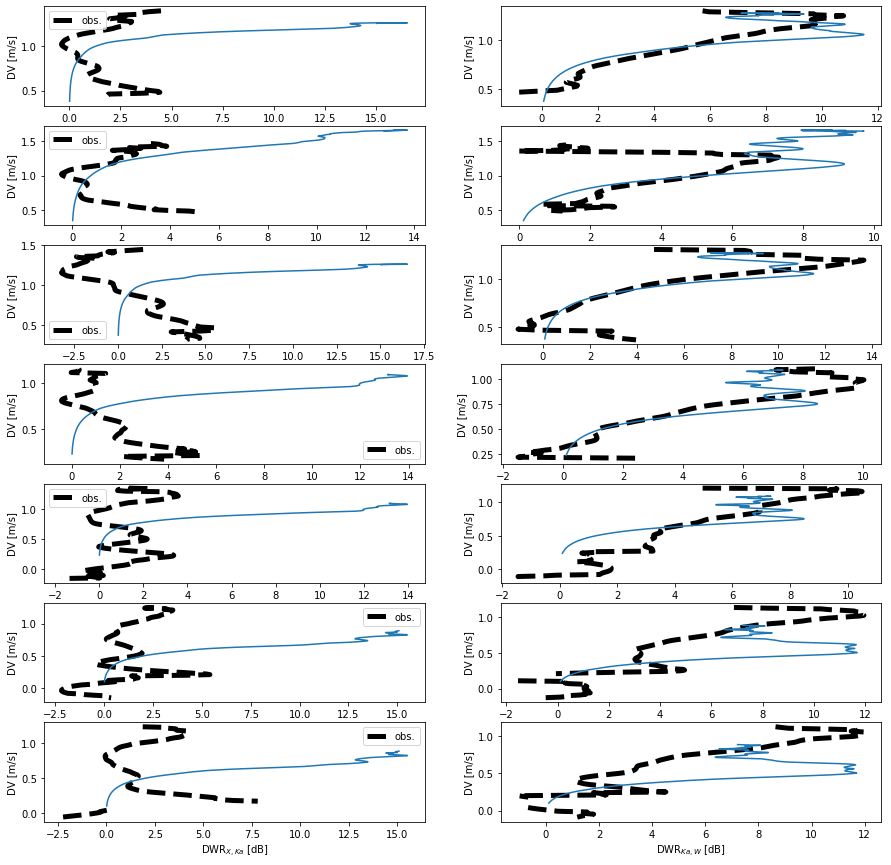

In [22]:
fig,ax = plt.subplots(nrows=len(heights),ncols=2, figsize=(15,15), sharex=False, sharey=False)

whichDWRsToUse="DWR_Ka_W" # choose from ["both","DWR_Ka_W",""DWR_X_Ka]
#find best fitting particle type
ParticleTypeList = [*snowScatt.snowLibrary._fileList.keys()] # read https://www.python.org/dev/peps/pep-0448/ 
ChosenParticles = []
# for the [*...] formalism
for i in range(len(heights)):
    bestPartType,orderedListPartType = rU.findBestFittingPartType(ParticleTypeList,
                                                                SpecWindows[i],
                                                                whichDWRsToUse=whichDWRsToUse)
    ChosenParticles.append(bestPartType)
    #plot sDWR vs DV for best fitting particle type
    Zx, Zk, Zw, Dmax, K2, vel = sc.model3fOne(bestPartType)
    DWRxk = Zx - Zk; DWRkw = Zk - Zw
    ax[i,:] = pl.plotSDWRvsDVobs(SpecWindows[i],ax[i,:])
    ax[i,:] = pl.plotSDWRvsDVmodel(vel,DWRxk,DWRkw,ax[i,:],bestPartType)

### Plot Ka-Reflectivity for each DV bin for each Chosen Particle Type
The total reflectivity will be devided by this reflectivity to obtain a particle number estimate  for the DV-bin.

['Leinonen15tabB01', 'vonTerzi_column', 'Leinonen15tabB01', 'vonTerzi_needle', 'vonTerzi_needle', 'vonTerzi_dendrite', 'vonTerzi_dendrite']
['Leinonen15tabB01', 'vonTerzi_column', 'Leinonen15tabB01', 'vonTerzi_needle', 'vonTerzi_needle', 'vonTerzi_dendrite', 'vonTerzi_dendrite']
['Leinonen15tabB01', 'vonTerzi_column', 'Leinonen15tabB01', 'vonTerzi_needle', 'vonTerzi_needle', 'vonTerzi_dendrite', 'vonTerzi_dendrite']
['Leinonen15tabB01', 'vonTerzi_column', 'Leinonen15tabB01', 'vonTerzi_needle', 'vonTerzi_needle', 'vonTerzi_dendrite', 'vonTerzi_dendrite']
['Leinonen15tabB01', 'vonTerzi_column', 'Leinonen15tabB01', 'vonTerzi_needle', 'vonTerzi_needle', 'vonTerzi_dendrite', 'vonTerzi_dendrite']
['Leinonen15tabB01', 'vonTerzi_column', 'Leinonen15tabB01', 'vonTerzi_needle', 'vonTerzi_needle', 'vonTerzi_dendrite', 'vonTerzi_dendrite']
['Leinonen15tabB01', 'vonTerzi_column', 'Leinonen15tabB01', 'vonTerzi_needle', 'vonTerzi_needle', 'vonTerzi_dendrite', 'vonTerzi_dendrite']


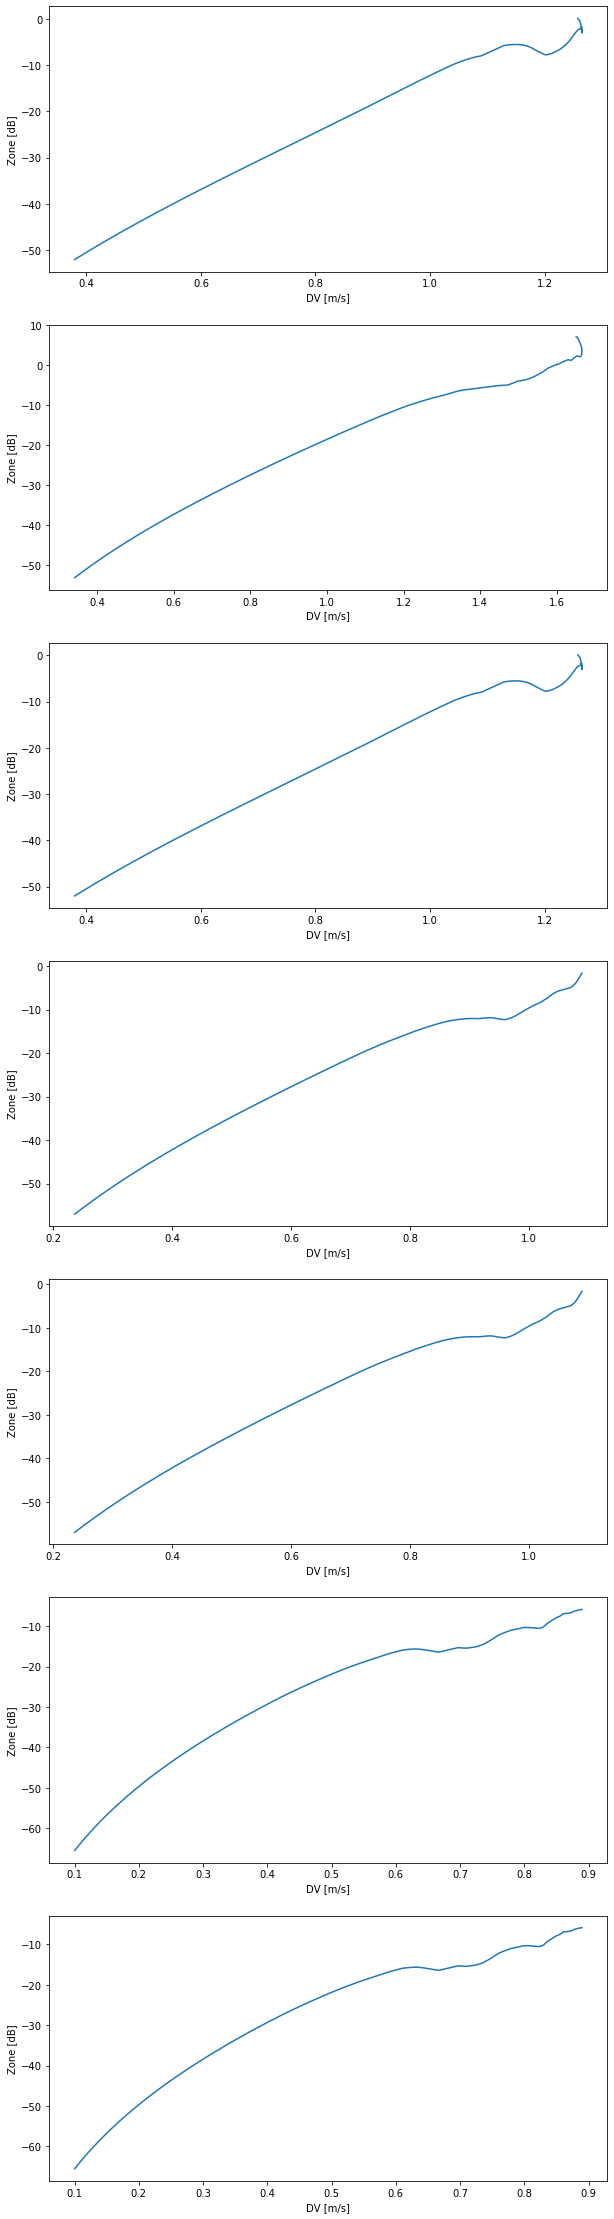

In [23]:
fig,ax = plt.subplots(nrows=len(heights),ncols=1,figsize=(10,40))
for i in range(len(heights)):
    print(ChosenParticles)
    ax[i] = pl.plotSinglePartZe(ChosenParticles[i],ax[i],freq="Ka")

### Show Retrieved Particle Velocity Distribution (left) and Retrieved Particle Size Distribution (right)
The velocity distribution is derived by dividing the observed spectral power by the single particle backscattering cross section at each DV-bin: N(D)=ze/sigma_single. For the size distribution use the velocity-size-relation provided in snowscatt's particle type model.

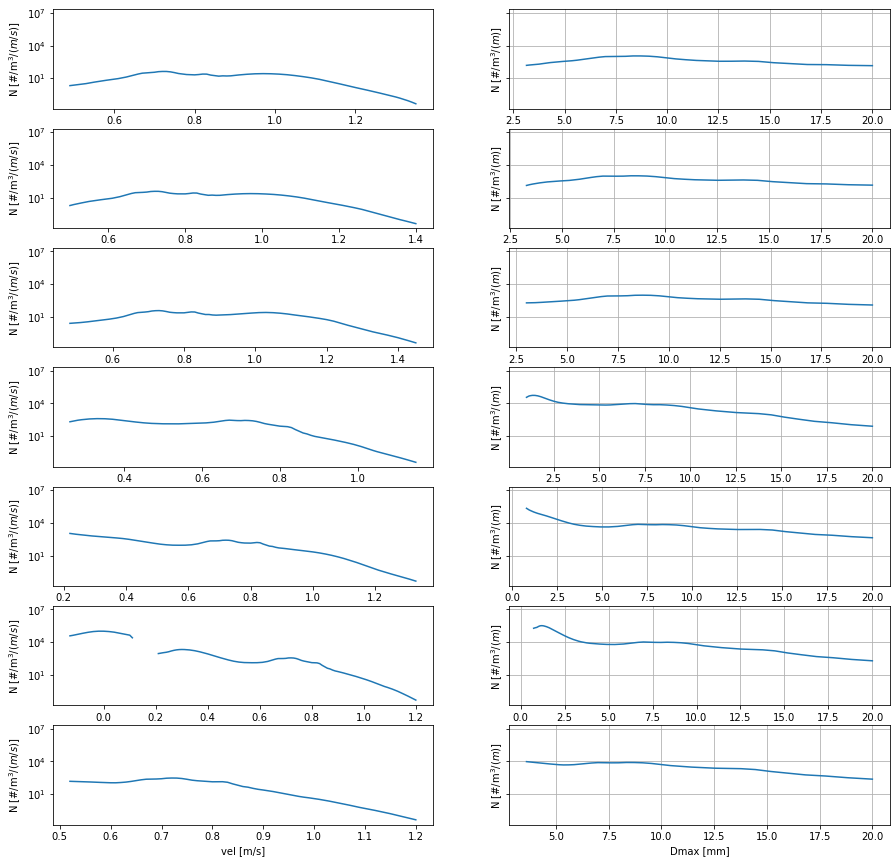

In [24]:
fig,axes = plt.subplots(nrows=len(heights),ncols=2,figsize=(15,15), sharey=True)

PSDsAndStuff = []
for i in range(len(heights)):
    velObs,NumConNormV,NumConNormD,DmaxAtObsDVgrid = rU.calculateNumberForEachDVbin(
        Zk,SpecSingles[i].KaSpecH.values,vel,-SpecSingles[i].KaSpecH.doppler.values,DmaxModel=Dmax)
    PSDsAndStuff.append([velObs,NumConNormV,NumConNormD,DmaxAtObsDVgrid])
    axes[i,:] = pl.plotNumCon(NumConNormV,NumConNormD,axes[i,:],velObs,DmaxAtObsDVgrid*1e3)
    axes[i,1].grid()
#plt.tight_layout()

### Derive Ice Water Content and Total Particle Number

#### Total Particle number
from velocity distribution (left) and size distribution (right)

12 7
11 7
12 7
128 128
184 179
18161 659
59 58


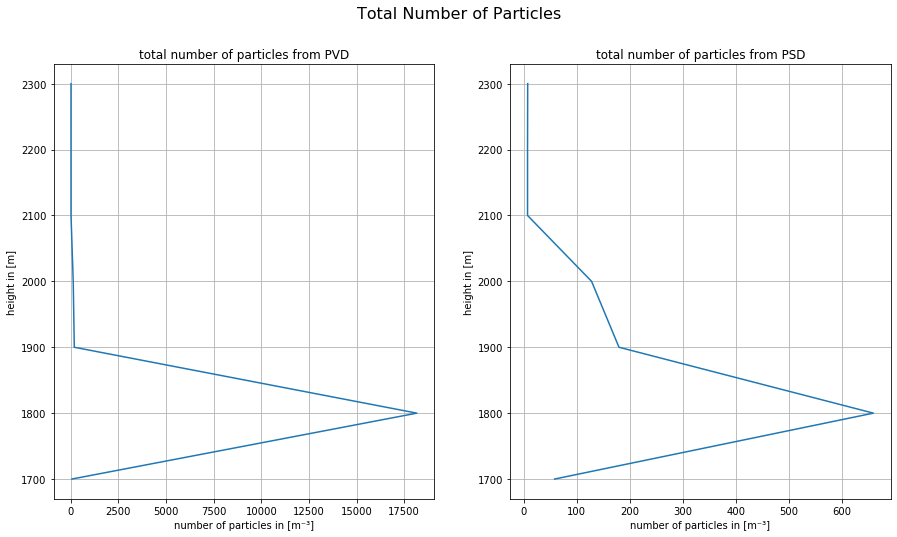

In [25]:
tpnv_array = []
tpnd_array = []
for i in range(len(heights)):
    # total particle number by doppler velocity
    NumConNormV = PSDsAndStuff[i][1]
    velObs = PSDsAndStuff[i][0]
    NumInVBin = NumConNormV[:-1]*abs(np.diff(velObs))
    tpnv = np.nansum(NumInVBin)
    tpnv_array.append(tpnv)
    # total particle number by diameter
    NumConNormD = PSDsAndStuff[i][2]
    DmaxAtObsDVgrid = PSDsAndStuff[i][3]
    NumInDBin = NumConNormD[:-1]*abs(np.diff(DmaxAtObsDVgrid))
    tpnd = np.nansum(NumInDBin)
    tpnd_array.append(tpnd)

    print(int(tpnv), int(tpnd))

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))

fig.suptitle('Total Number of Particles', fontsize=16)

ax[0].plot(tpnv_array,heights)
ax[1].plot(tpnd_array,heights)

ax[0].set_title('total number of particles from PVD')
ax[1].set_title('total number of particles from PSD')
ax[0].set_xlabel('number of particles in [m⁻³]')
ax[0].set_ylabel('height in [m]')
ax[0].grid()
ax[1].set_xlabel('number of particles in [m⁻³]')
ax[1].set_ylabel('height in [m]')
ax[1].grid()

plt.show()

#### Ice Water Contents
from size distribution

3.309216055219886e-05
3.285261375050842e-05
3.330712970487426e-05
0.00015584257556425717
0.00020622462025571508
0.00023165335326780508
0.00018808070331969047


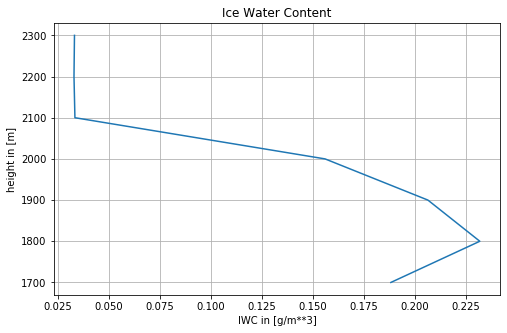

In [26]:
# TO DO: Use particle-type-specific parameters here instead.
a_m = 0.038
b_m = 2.
IWC_array = []
for i in range(len(heights)):
    NumConNormD = PSDsAndStuff[i][2]
    D = PSDsAndStuff[i][3]
    x = np.array([a_m*d**b_m for d in D])
    IWC = np.nansum(NumConNormD[:-1]*x[:-1]*abs(np.diff(D)))    # This means: integral N(D)*m(D) dD.
    IWC_array.append(IWC)
    print(IWC)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,5))
ax.plot(np.multiply(IWC_array,1e3),heights)
ax.set_title('Ice Water Content')
ax.set_xlabel('IWC in [g/m**3]')
ax.set_ylabel('height in [m]')
ax.grid()
plt.show()

### Cross Check (Compare ZeX from Observation and Forward Operated ZeX from Retrieval)

In [27]:
for i in range(len(heights)):
    DmaxAtObsDVgrid = PSDsAndStuff[i][3]
    NumConNormD = PSDsAndStuff[i][2]
    bestPartType = ChosenParticles[i]
    SpecSingles_i = SpecSingles[i]
    velObs = PSDsAndStuff[i][0]
    rU.crossCheckIntegratedProp(DmaxAtObsDVgrid,NumConNormD,SpecSingles_i.XSpecH,bestPartType,velObs=velObs)

full PSD
Nretrieval 7.771970020043114 1/m^3 IWCretrieval 0.02301256937073957 g/m^3 MassMedianDiam 13.1310386535359 mm
ZeXobs:  1.2060739227750341 ZxFromRetrievedPSD 14.7313560439145
full PSD
Nretrieval 7.473448490007019 1/m^3 IWCretrieval 0.034424466830098026 g/m^3 MassMedianDiam 13.770082062252461 mm
ZeXobs:  2.8352751833942236 ZxFromRetrievedPSD 18.42892703509675
full PSD
Nretrieval 7.476531098284781 1/m^3 IWCretrieval 0.02316473458733895 g/m^3 MassMedianDiam 13.1310386535359 mm
ZeXobs:  3.0052804149506747 ZxFromRetrievedPSD 14.851681183501103
full PSD
Nretrieval 130.87225367763995 1/m^3 IWCretrieval 0.06218962921839967 g/m^3 MassMedianDiam 9.11276540155489 mm
ZeXobs:  4.793378409030526 ZxFromRetrievedPSD 16.680608588010625
full PSD
Nretrieval 194.63618638620702 1/m^3 IWCretrieval 0.08269444682760585 g/m^3 MassMedianDiam 11.423414546321878 mm
ZeXobs:  6.526239333513146 ZxFromRetrievedPSD 18.465226030637044
full PSD
Nretrieval 3648.88464221392 1/m^3 IWCretrieval 0.062260746979982726 g

### Cross Check (Compare Observed Spectra and Forward Operated Spectra from PSD)

!!! Not working yet!!!

In [44]:
ref_per_height = []                   # in linear units
dopvel = []
for i in range(len(heights)):
    Nd = PSDsAndStuff[i][2]
    D = PSDsAndStuff[i][3]
    vel = PSDsAndStuff[i][0]
    for j in [0,1,2]:                  # 0...X, 1...Ka, 2...W
        ref_D = sc.model3fOne(ChosenParticles[i],Dmax=D,lindB="lin")[j]
        ref = np.multiply(Nd,ref_D)
        ref_per_height.append(ref)
        dopvel.append(sc.model3fOne(ChosenParticles[i],Dmax=D,lindB="lin")[5])
        #dopvel.append(vel)

#### Plot Forward Operated Spectra from PSDs

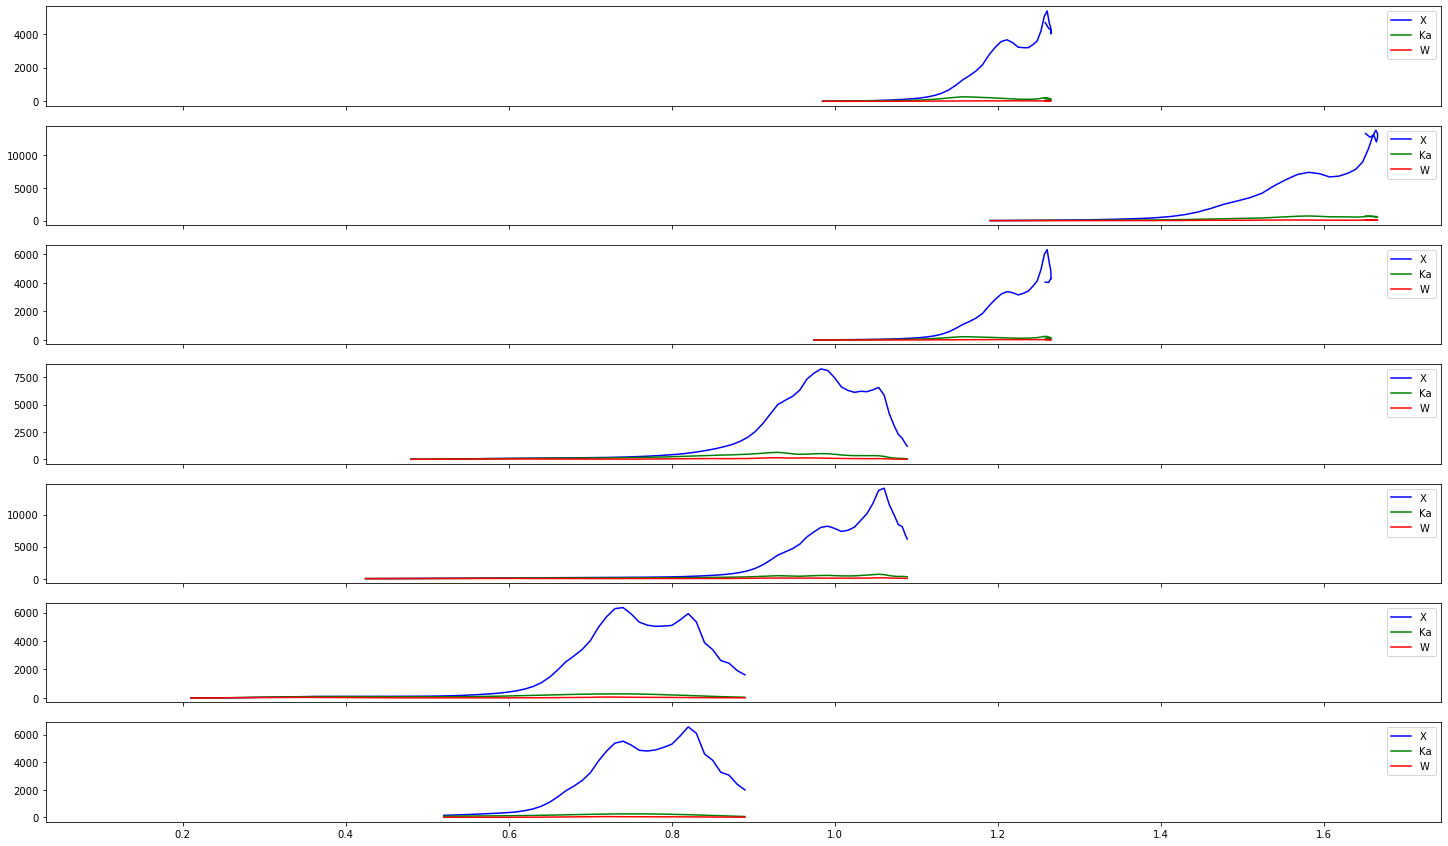

In [48]:
fig,ax = plt.subplots(nrows=len(heights),ncols=1, figsize=(25,15), sharex=True)
for i in range(len(heights)):
    ax[i].plot(dopvel[3*i+0], ref_per_height[3*i+0], color='blue', label='X')
    ax[i].plot(dopvel[3*i+1], ref_per_height[3*i+1], color='green', label='Ka')
    ax[i].plot(dopvel[3*i+2], ref_per_height[3*i+2], color='red', label='W')
    ax[i].legend()

#### Plot Comparison

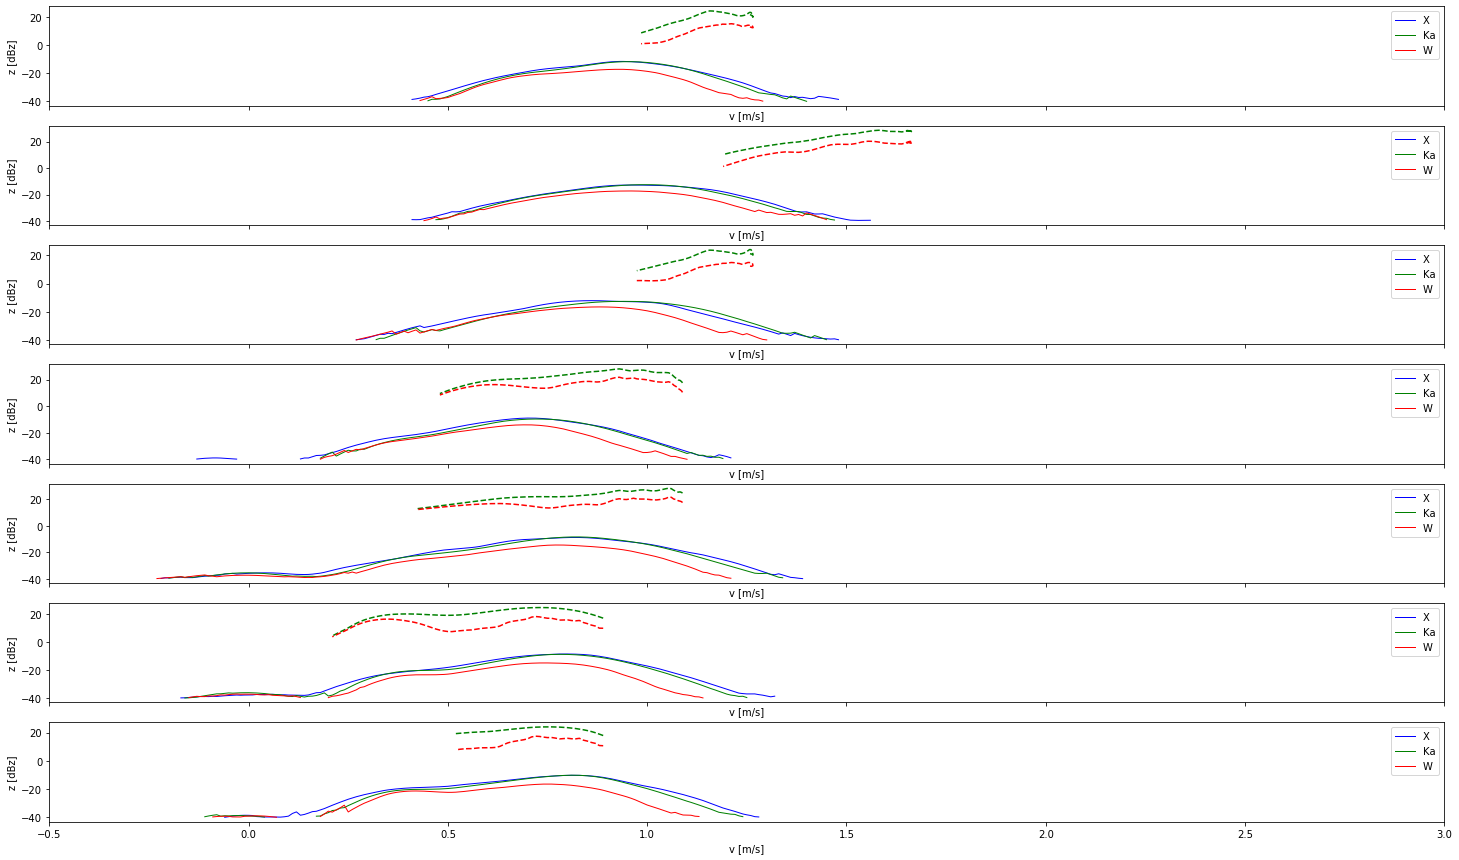

In [51]:
fig,ax = plt.subplots(nrows=len(heights),ncols=1, figsize=(25,15), sharex=True)
for i in range(len(heights)):
    ax[i] = pl.plotObsSpectra(mean_SpecWindows_shiftedandpruned[i],ax[i])
    #ax[i].plot(dopvel[3*i+0],rU.dB(ref_per_height[3*i+0]), color='blue', label='X_retr', linestyle='--')
    ax[i].plot(dopvel[3*i+1],rU.dB(ref_per_height[3*i+1]), color='green', label='Ka_retr', linestyle='--')
    ax[i].plot(dopvel[3*i+2],rU.dB(ref_per_height[3*i+2]), color='red', label='W_retr', linestyle='--')

### Cross Check (Compare Observed DV-DWR-Relation and Forward Operated DV-DWR-Relation from Spectra)

!!! Also not working yet because it uses retrieved spectra!!!

plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window
plot average DV vs DWR for a time-height window


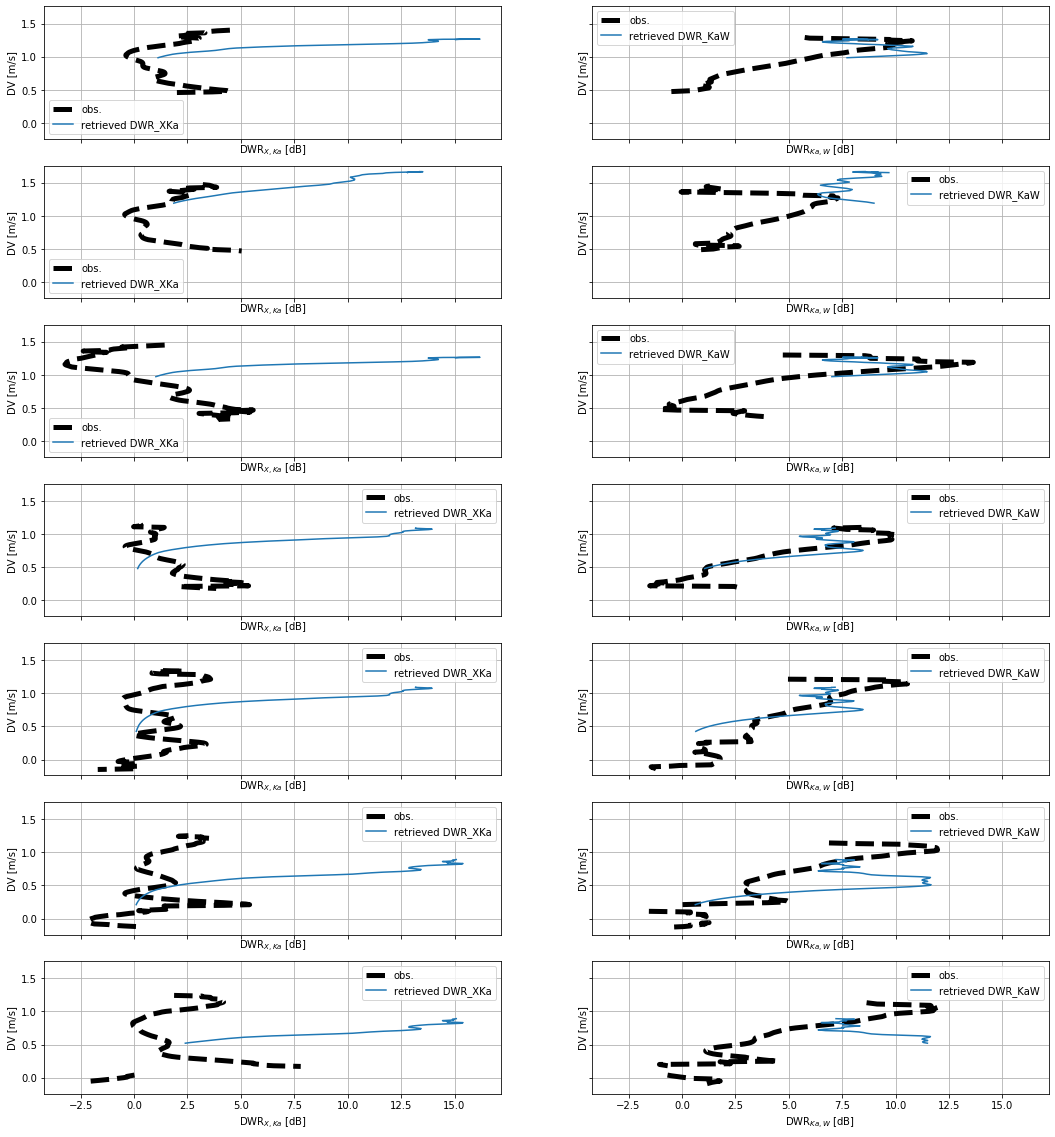

In [57]:
# plot average DV vs. DWR from time-height window
fig,ax = plt.subplots(nrows=len(heights),ncols=2, figsize=(18,20), sharex=True, sharey=True)
for i in range(len(heights)):
    __ = pl.plotSDWRvsDVobs(SpecWindows[i],ax[i,:])
    ax[i,0].plot(rU.dB(ref_per_height[3*i+0])-rU.dB(ref_per_height[3*i+1]), dopvel[3*i+1], label= 'retrieved DWR_XKa')
    ax[i,1].plot(rU.dB(ref_per_height[3*i+1])-rU.dB(ref_per_height[3*i+2]), dopvel[3*i+1], label= 'retrieved DWR_KaW')
    ax[i,0].grid()
    ax[i,1].grid()
    ax[i,0].legend()
    ax[i,1].legend()